# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)



634

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "api.openweathermap.org/data/2.5/weather?q="
from pandas.io.json import json_normalize


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
##api.openweathermap.org/data/2.5/weather?q={city name}

response_json = []

for city in cities:
    # Get one of the posts  &unites=imperial gives me fahrenheit
    post_response = requests.get(url + "appid=" + "d4c1572387c0df1dd5ea04d14816116c" + "&q=" + city + "&units=imperial").json()
    time.sleep(1)
    # Save post's JSON
    try: 
        response_json.append({'City': post_response["name"],
                           'Cloudiness': post_response["clouds"]["all"], 
                          'Country': post_response["sys"]["country"], 
                          'Humidity': post_response["main"]["humidity"],
                          'Latidute': post_response["coord"]["lat"],
                          'Longitude': post_response["coord"]["lon"],
                          'Max Temp': post_response["main"]["temp_max"],
                          'Wind Speed': post_response["wind"]["speed"]                          
                                  })
    except KeyError: 
        print("null")
    


null
null
null
null
null
null
null
null
null
null
null
null
null
null
null
null
null
null
null
null
null
null
null
null
null
null
null
null
null
null
null
null
null
null
null
null
null
null
null
null
null
null
null
null
null
null
null
null
null
null
null
null
null
null
null
null
null
null
null
null
null
null
null
null
null
null
null
null
null


In [6]:
response_json 

[{'City': 'Huarmey',
  'Cloudiness': 69,
  'Country': 'PE',
  'Humidity': 90,
  'Latidute': -10.07,
  'Longitude': -78.15,
  'Max Temp': 59.35,
  'Wind Speed': 11.07},
 {'City': 'Paamiut',
  'Cloudiness': 0,
  'Country': 'GL',
  'Humidity': 66,
  'Latidute': 61.99,
  'Longitude': -49.67,
  'Max Temp': 42.25,
  'Wind Speed': 7.47},
 {'City': 'Katsuura',
  'Cloudiness': 90,
  'Country': 'JP',
  'Humidity': 88,
  'Latidute': 33.93,
  'Longitude': 134.5,
  'Max Temp': 71.6,
  'Wind Speed': 6.93},
 {'City': 'Cape Town',
  'Cloudiness': 0,
  'Country': 'ZA',
  'Humidity': 68,
  'Latidute': -33.93,
  'Longitude': 18.42,
  'Max Temp': 64.99,
  'Wind Speed': 14.99},
 {'City': 'Rikitea',
  'Cloudiness': 80,
  'Country': 'PF',
  'Humidity': 68,
  'Latidute': -23.12,
  'Longitude': -134.97,
  'Max Temp': 70.33,
  'Wind Speed': 20.96},
 {'City': 'Punta Arenas',
  'Cloudiness': 75,
  'Country': 'CL',
  'Humidity': 93,
  'Latidute': -53.16,
  'Longitude': -70.91,
  'Max Temp': 46.4,
  'Wind Speed': 4

In [8]:
response_json 
print(json.dumps(response_json, indent=4, sort_keys=True))



[
    {
        "City": "Huarmey",
        "Cloudiness": 69,
        "Country": "PE",
        "Humidity": 90,
        "Latidute": -10.07,
        "Longitude": -78.15,
        "Max Temp": 59.35,
        "Wind Speed": 11.07
    },
    {
        "City": "Paamiut",
        "Cloudiness": 0,
        "Country": "GL",
        "Humidity": 66,
        "Latidute": 61.99,
        "Longitude": -49.67,
        "Max Temp": 42.25,
        "Wind Speed": 7.47
    },
    {
        "City": "Katsuura",
        "Cloudiness": 90,
        "Country": "JP",
        "Humidity": 88,
        "Latidute": 33.93,
        "Longitude": 134.5,
        "Max Temp": 71.6,
        "Wind Speed": 6.93
    },
    {
        "City": "Cape Town",
        "Cloudiness": 0,
        "Country": "ZA",
        "Humidity": 68,
        "Latidute": -33.93,
        "Longitude": 18.42,
        "Max Temp": 64.99,
        "Wind Speed": 14.99
    },
    {
        "City": "Rikitea",
        "Cloudiness": 80,
        "Country": "PF",
        "Hum

AttributeError: 'list' object has no attribute 'values'

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [39]:
weatherDF = pd.DataFrame(response_json)
weatherDF.head()
weatherDF.to_csv("WeatherDF.csv", index=False, header=True)
weatherDF.head()
weatherDF.Cloudiness = weatherDF.Cloudiness.astype(np.int64)
weatherDF.head()



,City,Cloudiness,Country,Humidity,Latidute,Longitude,Max Temp,Wind Speed
0,Huarmey,69,PE,90,-10.07,-78.15,59.35,11.07
1,Paamiut,0,GL,66,61.99,-49.67,42.25,7.47
2,Katsuura,90,JP,88,33.93,134.50,71.60,6.93
3,Cape Town,0,ZA,68,-33.93,18.42,64.99,14.99
4,Rikitea,80,PF,68,-23.12,-134.97,70.33,20.96


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

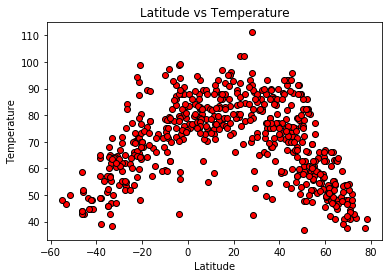

In [43]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np

latitude = weatherDF["Latidute"]
Temperature = weatherDF["Max Temp"]

plt.scatter(latitude, Temperature, marker="o", facecolors="red", edgecolors="black")

plt.title("Latitude vs Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature")

plt.savefig("../Images/Latitude Vs Temperature.png")

#### Latitude vs. Humidity Plot

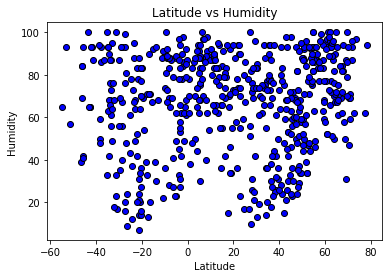

In [47]:
weatherDF2=weatherDF[weatherDF['Humidity']< 150]


latitude = weatherDF2["Latidute"]
Humidity = weatherDF2["Humidity"]

plt.scatter(latitude, Humidity, marker="o", facecolors="blue", edgecolors="black")

plt.title("Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.savefig("../Images/Latitude Vs Humidity.png")

#### Latitude vs. Cloudiness Plot

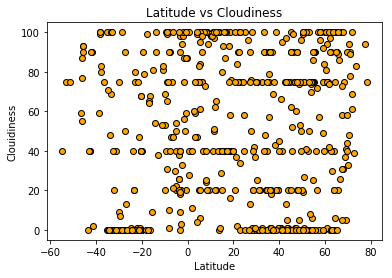

In [51]:
latitude = weatherDF["Latidute"]
Cloudiness = weatherDF["Cloudiness"]

plt.scatter(latitude, Cloudiness, marker="o", facecolors="orange", edgecolors="black")

plt.title("Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Clouidiness")

plt.savefig("../Images/Latitude Vs Cloudiness.png")

#### Latitude vs. Wind Speed Plot

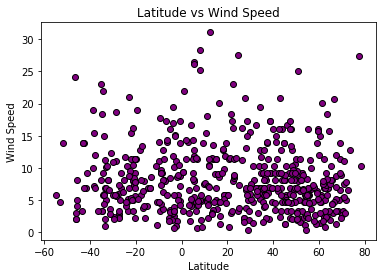

In [52]:
latitude = weatherDF["Latidute"]
WindSpeed = weatherDF["Wind Speed"]

plt.scatter(latitude, WindSpeed, marker="o", facecolors="purple", edgecolors="black")

plt.title("Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

plt.savefig("../Images/Latitude Vs Wind Speed.png")